<a href="https://colab.research.google.com/github/Sj3604/Data-Science-Projects-/blob/main/Gdp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/world_gdp_data.csv", encoding='latin-1')
print(df.info())
print(df.head())
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    196 non-null    object 
 1   indicator_name  196 non-null    object 
 2   1980            141 non-null    float64
 3   1981            145 non-null    float64
 4   1982            147 non-null    float64
 5   1983            147 non-null    float64
 6   1984            147 non-null    float64
 7   1985            147 non-null    float64
 8   1986            148 non-null    float64
 9   1987            149 non-null    float64
 10  1988            150 non-null    float64
 11  1989            150 non-null    float64
 12  1990            150 non-null    float64
 13  1991            158 non-null    float64
 14  1992            160 non-null    float64
 15  1993            171 non-null    float64
 16  1994            173 non-null    float64
 17  1995            175 non-null    flo

,0
country_name,0
indicator_name,0
1980,55
1981,51
1982,49
1983,49
1984,49
1985,49
1986,48
1987,47


In [28]:
df.dropna(inplace=True)
display(df.head())
display(df.isnull().sum())

,country_name,indicator_name,1980,1981,1982,1983,1984,1985,1986,1987,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,Albania,Annual GDP growth (percent change),2.7,5.7,2.9,1.1,2.0,-1.5,5.6,-0.8,...,2.2,3.3,3.8,4.0,2.1,-3.3,8.9,4.8,3.6,3.3
2,Algeria,Annual GDP growth (percent change),-5.4,3.0,6.4,5.4,5.6,5.6,-0.2,-0.7,...,3.7,3.2,1.4,1.2,1.0,-5.1,3.4,3.2,3.8,3.1
4,Angola,Annual GDP growth (percent change),2.4,-4.4,0.0,4.2,6.0,3.5,2.9,4.1,...,0.9,-2.6,-0.2,-1.3,-0.7,-5.6,1.2,3.0,1.3,3.3
5,Antigua and Barbuda,Annual GDP growth (percent change),8.2,3.8,-0.1,5.4,10.2,7.6,11.5,6.6,...,3.8,5.5,3.1,6.8,4.3,-17.5,6.6,8.5,5.6,5.4
6,Argentina,Annual GDP growth (percent change),0.7,-5.7,-3.1,3.7,2.0,-7.0,7.1,2.5,...,2.7,-2.1,2.8,-2.6,-2.0,-9.9,10.7,5.0,-2.5,2.8


,0
country_name,0
indicator_name,0
1980,0
1981,0
1982,0
1983,0
1984,0
1985,0
1986,0
1987,0


In [29]:
# Calculate the average GDP growth for each country
df['average_gdp_growth'] = df.iloc[:, 2:].mean(axis=1)

# Display the dataframe with the new column
display(df[['country_name', 'average_gdp_growth']].head())

,country_name,average_gdp_growth
1,Albania,2.906667
2,Algeria,2.491111
4,Angola,4.793333
5,Antigua and Barbuda,3.515556
6,Argentina,1.775556


In [30]:
from sklearn.cluster import KMeans

# Prepare data for clustering (using only the average GDP growth)
X = df[['average_gdp_growth']]

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['cluster_label'] = kmeans.fit_predict(X)

# Display the dataframe with cluster labels
display(df[['country_name', 'average_gdp_growth', 'cluster_label']].head())

,country_name,average_gdp_growth,cluster_label
1,Albania,2.906667,2
2,Algeria,2.491111,2
4,Angola,4.793333,0
5,Antigua and Barbuda,3.515556,0
6,Argentina,1.775556,2


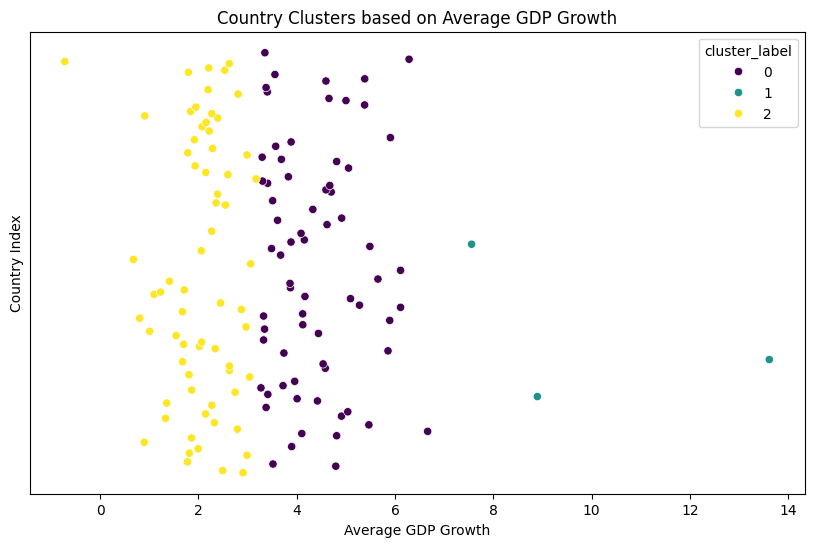

In [31]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average_gdp_growth', y=df.index, hue='cluster_label', data=df, palette='viridis', legend='full')
plt.title('Country Clusters based on Average GDP Growth')
plt.xlabel('Average GDP Growth')
plt.ylabel('Country Index') # Using index as a placeholder, consider using country names if space allows
plt.yticks([]) # Hide y-axis ticks for better visualization of clusters
plt.show()

**Summary of Country Clusters based on Average GDP Growth:**

The countries have been grouped into three clusters based on their average GDP growth:

*   **Cluster 0:** This cluster appears to represent countries with moderate to high average GDP growth.
*   **Cluster 1:** This cluster contains a few outliers with exceptionally high average GDP growth.
*   **Cluster 2:** This cluster includes countries with lower average GDP growth, including some with negative growth.

This clustering provides a high-level grouping of countries based on their historical GDP performance.

In [32]:
# Find the country with the highest average GDP growth
country_highest_growth = df.loc[df['average_gdp_growth'].idxmax()]

# Display the country name and its average GDP growth
print("Country with the highest average GDP growth:")
display(country_highest_growth[['country_name', 'average_gdp_growth']])

Country with the highest average GDP growth:


,53
country_name,Equatorial Guinea
average_gdp_growth,13.613333


In [33]:
# Find the country with the lowest average GDP growth
country_lowest_growth = df.loc[df['average_gdp_growth'].idxmin()]

# Display the country name and its average GDP growth
print("Country with the lowest average GDP growth:")
display(country_lowest_growth[['country_name', 'average_gdp_growth']])

Country with the lowest average GDP growth:


,190
country_name,Venezuela
average_gdp_growth,-0.72


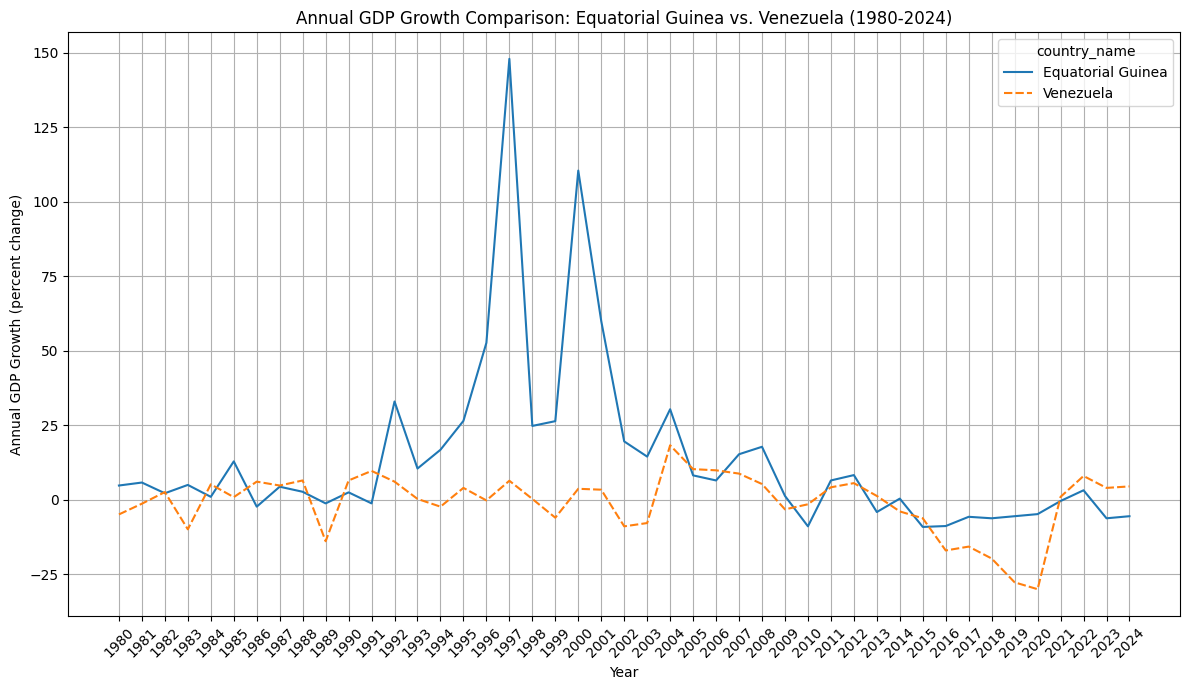

In [34]:
# Filter the DataFrame for the countries with the highest and lowest average GDP growth
countries_to_compare = df[df['country_name'].isin(['Equatorial Guinea', 'Venezuela'])]

# Select only the year columns for plotting
gdp_growth_years = countries_to_compare.set_index('country_name').loc[:, '1980':'2024']

# Transpose the dataframe for plotting
gdp_growth_years_transposed = gdp_growth_years.T

# Plot the GDP growth over the years
plt.figure(figsize=(12, 7))
sns.lineplot(data=gdp_growth_years_transposed)
plt.title('Annual GDP Growth Comparison: Equatorial Guinea vs. Venezuela (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Annual GDP Growth (percent change)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Summary of GDP Growth Comparison between Equatorial Guinea and Venezuela:**

The line graph clearly illustrates the vastly different GDP growth trajectories of Equatorial Guinea and Venezuela.

*   **Equatorial Guinea:** Shows significant volatility with extreme peaks and valleys in GDP growth, particularly during periods of oil price fluctuations, reflecting its heavy reliance on oil exports.
*   **Venezuela:** Exhibits a more consistent, though generally lower and often negative, GDP growth over the years, especially in recent times, highlighting economic challenges.

This comparison underscores the impact of different economic factors and resource dependencies on national GDP growth.